In [1]:
import tensorflow as tf
import numpy as np

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.2

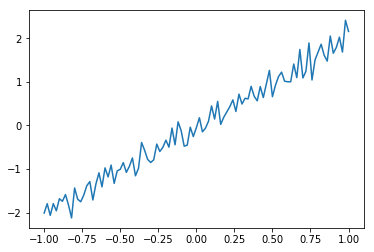

In [25]:
plt.plot(trX, trY)

In [26]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [27]:
def model(X, w):
    return tf.multiply(X, w)


In [28]:
w = tf.Variable(0.0, name="weight")
y = model(X, w)

In [29]:
cost = tf.square(Y - y)

In [30]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [31]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(20):
        for (x,y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})
        print(sess.run(w))

1.00526
1.50895
1.76133
1.88778
1.95114
1.98289
1.99879
2.00676
2.01076
2.01276
2.01376
2.01426
2.01451
2.01464
2.0147
2.01473
2.01475
2.01476
2.01476
2.01477


In [32]:
import torch

In [33]:
from torch.autograd import Variable

In [38]:
trX = torch.linspace(-1, 1, 101)
trY = 2 * trX + torch.rand(*trX.size()) * 0.33

torch.FloatTensor

In [46]:
w = Variable(trX.new([0.0]), requires_grad=True)

In [47]:
for i in range(20):
    for (x, y) in zip(trX, trY):
        X = Variable(x)
        Y = Variable(y)
        print(Y)
        y_model = X * w.expand_as(X)
        cost = (Y - y_model) ** 2
        cost.backward(torch.ones(*cost.size()))
        w.data = w.data + 0.01 * w.grad.data
        print(w)

RuntimeError: Variable data has to be a tensor, but got float